Data Science with Python
Assignment 01

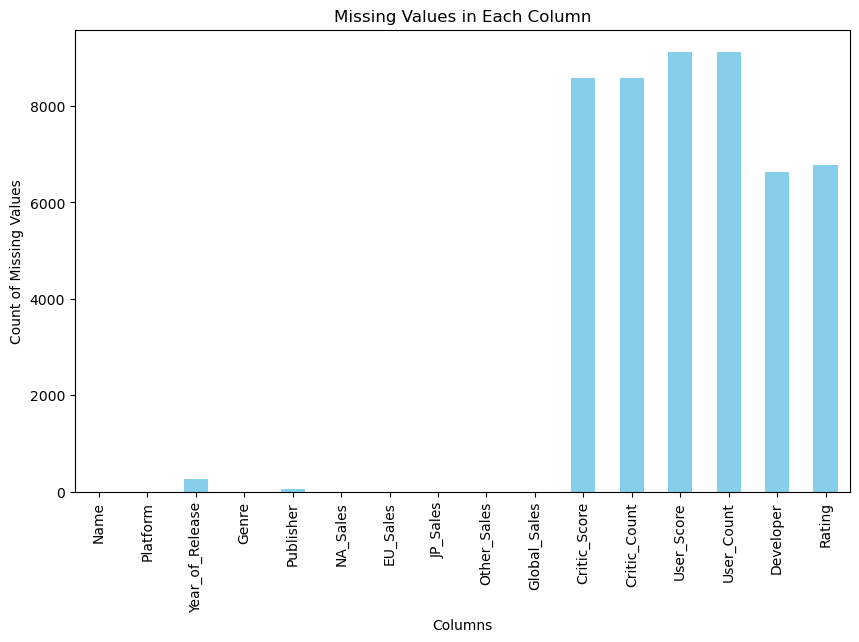

In [ ]:
# 1. How many missing values are there in each column of the Video Games Sales dataset? Display the results in a bar chart.

import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset 
df = pd.read_csv(r'D:\Downloads\vgsales.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Creating a bar chart for missing values
plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()




In [2]:
# 2. How can we handle missing values in the "Year_of_Release" column? Write a function to fill in missing values with the median year and show the first 10 rows in the dataframe.

# Getting the median 
median_year = df['Year_of_Release'].median()

# Replacing missing values with 
df['Year_of_Release'] = df['Year_of_Release'].fillna(median_year)

print(df['Year_of_Release'].head(10))

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
5    1989.0
6    2006.0
7    2006.0
8    2009.0
9    1984.0
Name: Year_of_Release, dtype: float64


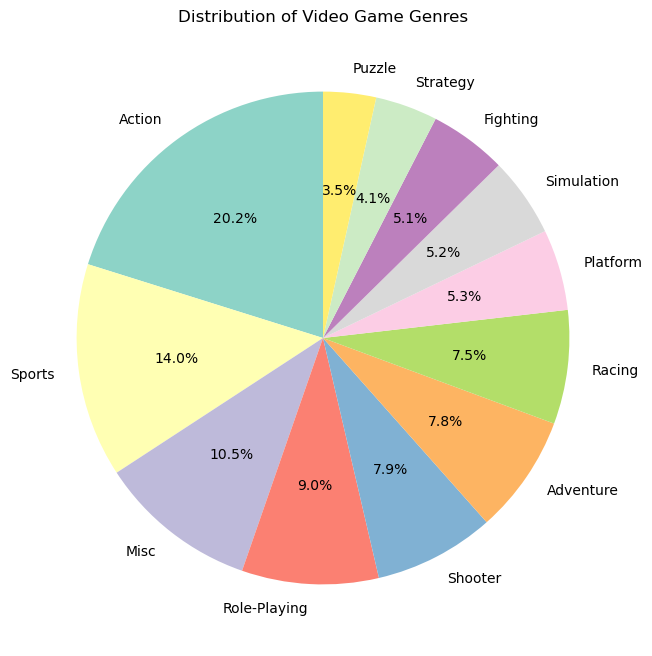

In [3]:
# 3. How does the distribution of video game genres look like in the dataset? Create a pie chart to visualize the count of games in each genre.

import pandas as pd

genre_counts = df['Genre'].value_counts()

# Create a pie chart to visualize the distribution of genres
plt.figure(figsize=(8,8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Video Game Genres')
plt.ylabel('')  # Hide the y-axis label
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3056\3016900534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Critic_Score', data=df, palette='Set3')


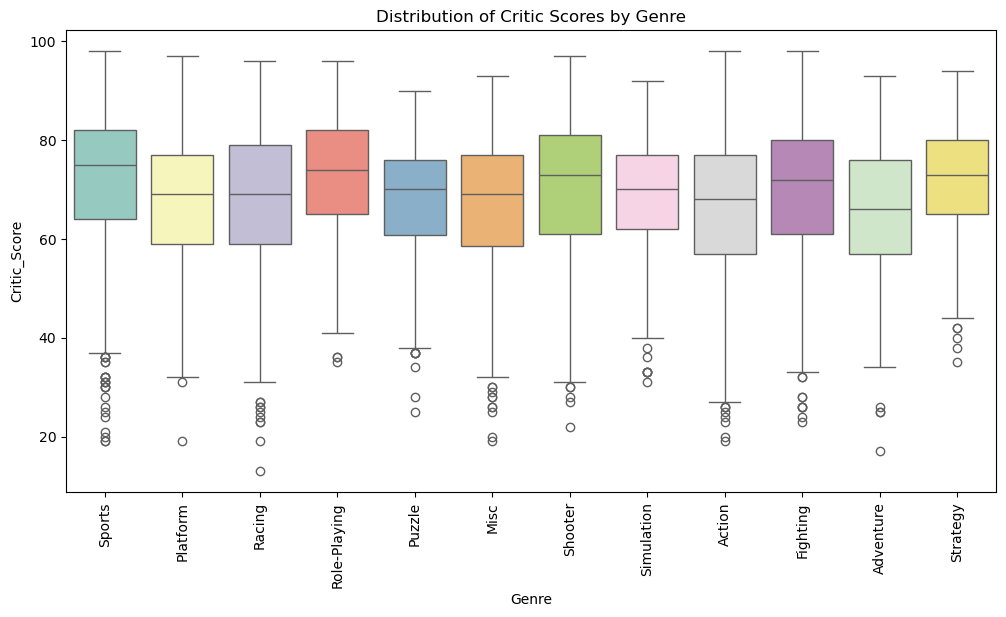

In [4]:
# 4. How does the distribution of critic scores vary by genre? Create a boxplot to visualize the distribution of critic scores by genre.

import seaborn as sns

# Create a boxplot to visualize the distribution of critic scores by genre
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Critic_Score', data=df, palette='Set3')
plt.title('Distribution of Critic Scores by Genre')
plt.xticks(rotation=90)
plt.show()

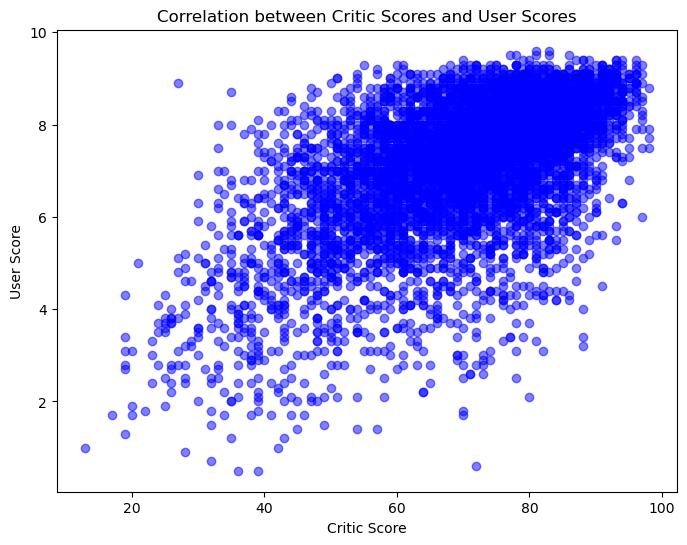

Correlation coefficient between Critic Scores and User Scores: 0.5808778320767244


In [7]:
# 5. Is there a correlation between critic scores and user scores for video games? Create a scatter plot to investigate this relationship.


# Create a scatter plot to visualize the relationship between critic scores and user scores
plt.figure(figsize=(8,6))
plt.scatter(df['Critic_Score'], df['User_Score'], alpha=0.5, color='blue')
plt.title('Correlation between Critic Scores and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()

# Optionally, calculate the correlation coefficient
correlation = df[['Critic_Score', 'User_Score']].corr().iloc[0, 1]
print(f'Correlation coefficient between Critic Scores and User Scores: {correlation}')

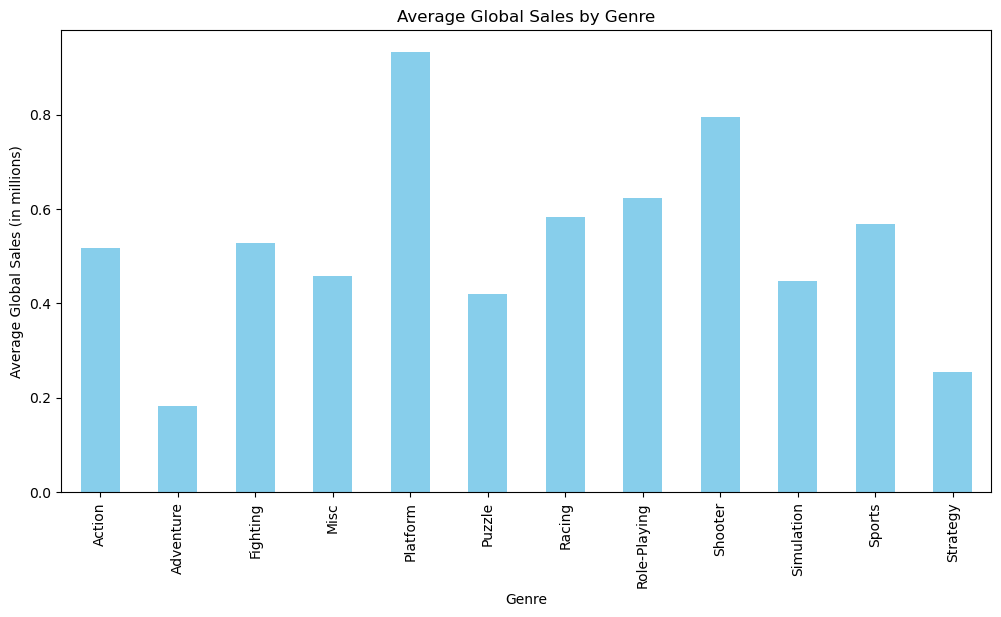

In [8]:
# 6. What is the average global sales for video games in each genre? Create a bar chart to visualize the average global sales by genre.

# Group by genre and calculate the average
avg_sales_by_genre = df.groupby('Genre')['Global_Sales'].mean()

# Create a bar chart to visualize
plt.figure(figsize=(12,6))
avg_sales_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

In [10]:
# 7. How many video games were released in each year, and what were the top 5 years with the highest number of game releases? Write a function to calculate this

games_per_year = df['Year_of_Release'].value_counts().sort_index()
    
# Get the top 5 years with the highest number of game releases
top_5_years = games_per_year.nlargest(5)

print("Top 5 years with the highest number of game releases:")
print(top_5_years)



Top 5 years with the highest number of game releases:
Year_of_Release
2007.0    1466
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
Name: count, dtype: int64


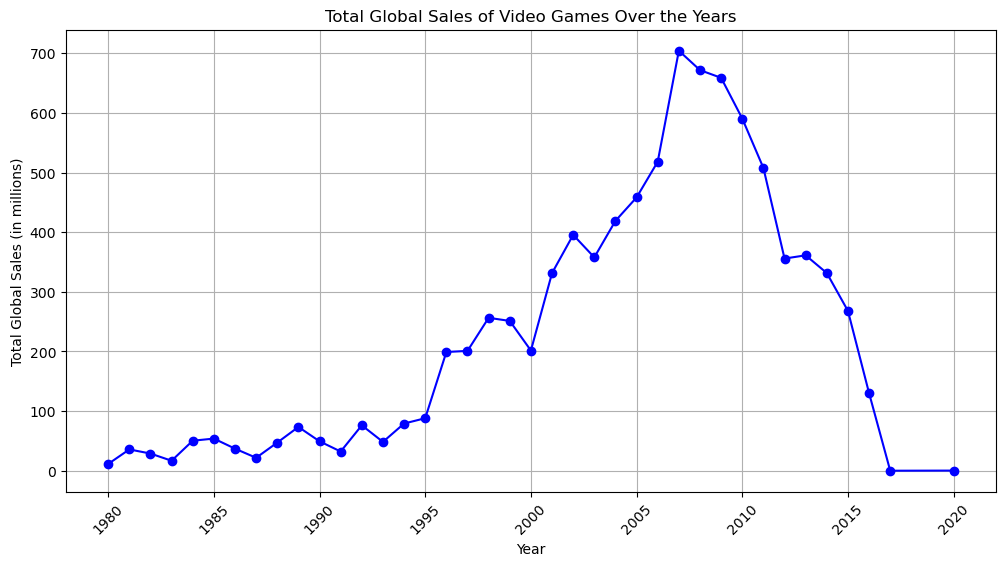

In [11]:
# 8. How has the total global sales of video games evolved over the years in the "vgsales" dataset? Create a line plot to visualize the trend.

# calculate the total global sales for each year
total_sales_by_year = df.groupby('Year_of_Release')['Global_Sales'].sum()

# Create a line plot to visualize the trend of total global sales over the years
plt.figure(figsize=(12,6))
plt.plot(total_sales_by_year.index, total_sales_by_year.values, marker='o', color='blue')
plt.title('Total Global Sales of Video Games Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

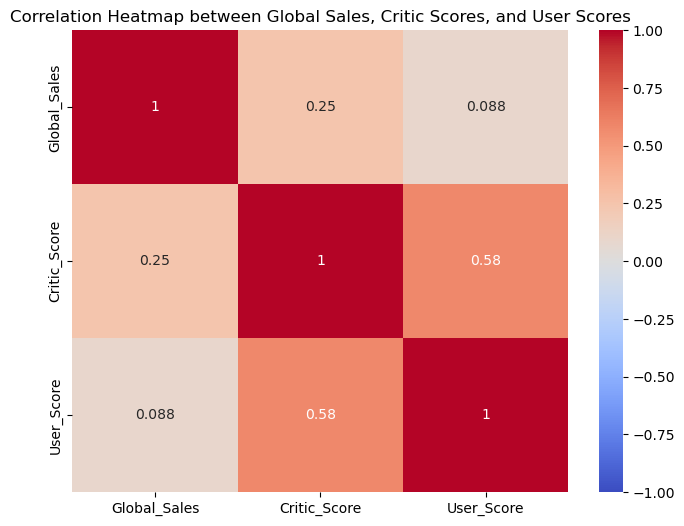

In [12]:
# 9. Visualize the correlation between global sales, critic scores, and user scores in the "vgsales" dataset using a heatmap.

correlation_data = df[['Global_Sales', 'Critic_Score', 'User_Score']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap between Global Sales, Critic Scores, and User Scores')
plt.show()

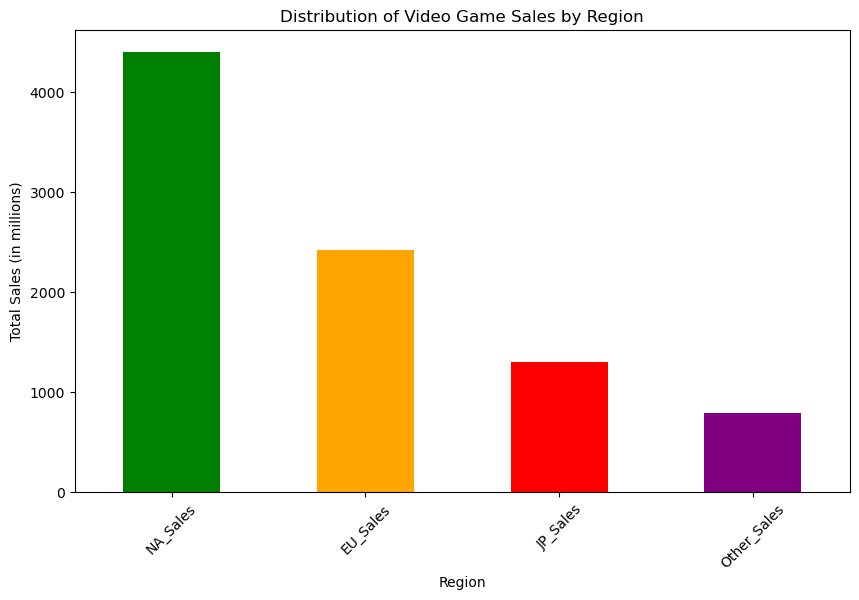

The region contributing the most to the total sales is NA_Sales with a total of 4402.620000000001 million sales.


In [15]:
# 10. Analyze the distribution of video game sales (e.g., global, North America, Europe, Japan, and other regions) in the "vgsales" dataset and identify which region contributes the most to the total sales?

# Calculate the total sales for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a bar chart to visualize the sales distribution across regions
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color=['green', 'orange', 'red', 'purple'])
plt.title('Distribution of Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Identify the region with the highest sales contribution
top_region = region_sales.idxmax()
top_region_sales = region_sales.max()

print(f"The region contributing the most to the total sales is {top_region} with a total of {top_region_sales} million sales.")

